**Round 3**

- apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.


***Managing imbalance in the dataset***

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.


# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold 
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [4]:
def load_data():
    """
    Load original .csv data and return as dataframe.
    
    OUTPUT:
    :dataframe:
    """
    X_hotcoded_combined_with_y = pd.read_csv("X_hotcoded_combined_with_y.csv")
    return X_hotcoded_combined_with_y

X_hotcoded_combined_with_y = load_data()

# X y Split

In [5]:
def get_X_y(df, target_feature):
    """
    Based on given dataframe split data into input and target feature(s).
    
    INPUT
    :dataframe:
    :target_feature (column):
    
    OUTPUT
    :input features dataframe (X):
    :target feature series (y):
    """
    X = df.drop([target_feature], axis=1)
    y = df[target_feature]
    return X, y

X, y = get_X_y(X_hotcoded_combined_with_y, "Churn")

# Train Test Split

In [6]:
def get_X_y_train_test(X, y, test_size, random_state):
    """
    INPUT
    :X - input features:
    :y - target feature:
    :test_size :
    :random_state:
    
    OUTPUT
    :X_train - input features for training:
    :X_train - input features for testing:
    :y_test - target feature for training:
    :y_train - target feature for testing:
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_X_y_train_test(X, y, .2, 42)

# Models without Cross Validation

## KNeighborsClassifier

In [7]:
def KNC(X, y, test_size, random_state, K, displayer=False):
    
    std_scaler = StandardScaler()
    X_scaled = std_scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = get_X_y_train_test(X_scaled, y, test_size, random_state)

    neigh = KNeighborsClassifier(n_neighbors = K)
    neigh.fit(X_train, y_train)

    y_pred_train_dt = neigh.predict(X_train)
    y_pred_test_dt = neigh.predict(X_test)

    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                             recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                                   'Test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                            recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

    if displayer:
        display(performance_df)

        fig, ax = plt.subplots(1,2, figsize=(14,8))

        plot_confusion_matrix(neigh,X_train,y_train,ax=ax[0], values_format = 'd')
        ax[0].title.set_text("Train Set")

        plot_confusion_matrix(neigh,X_test,y_test,ax=ax[1],values_format = 'd')
        ax[1].title.set_text("Test Set")
        plt.show()
    return neigh

,Error_metric,Train,Test
0,Accuracy,0.791800,0.790632
1,Precision,0.640313,0.625000
2,Recall,0.492647,0.522788


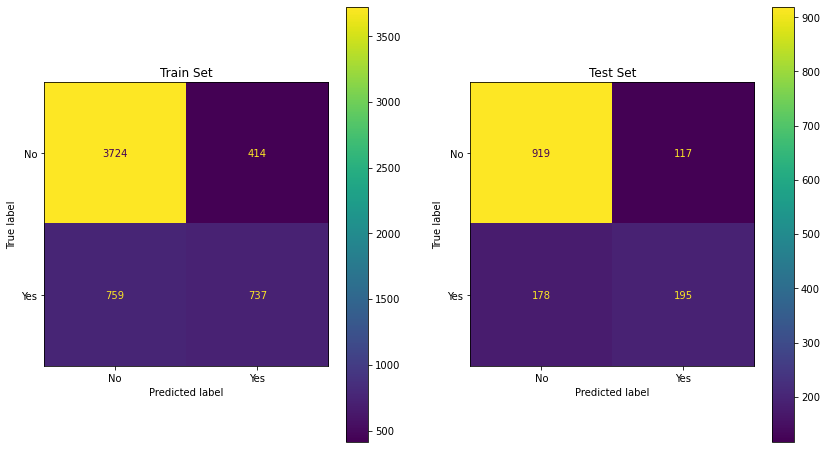

In [8]:
KNC_noCV = KNC(X, y, 0.2, 42, 28, True)

## DecisionTreeClassifier

In [9]:
def DTC(max_depth, X_train, y_train, X_test, displayer=False):

    model = DecisionTreeClassifier(max_depth = max_depth)
    model.fit(X_train, y_train)

    y_pred_train_dt = model.predict(X_train)
    y_pred_test_dt = model.predict(X_test)

    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                             recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                                   'Test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                            recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

    if displayer:
        display(performance_df)

        fig, ax = plt.subplots(1,2, figsize=(14,8))

        plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
        ax[0].title.set_text("Train Set")

        plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
        ax[1].title.set_text("Test Set")
        plt.show()
    return model

,Error_metric,Train,Test
0,Accuracy,0.801917,0.797729
1,Precision,0.690763,0.676000
2,Recall,0.459893,0.453083


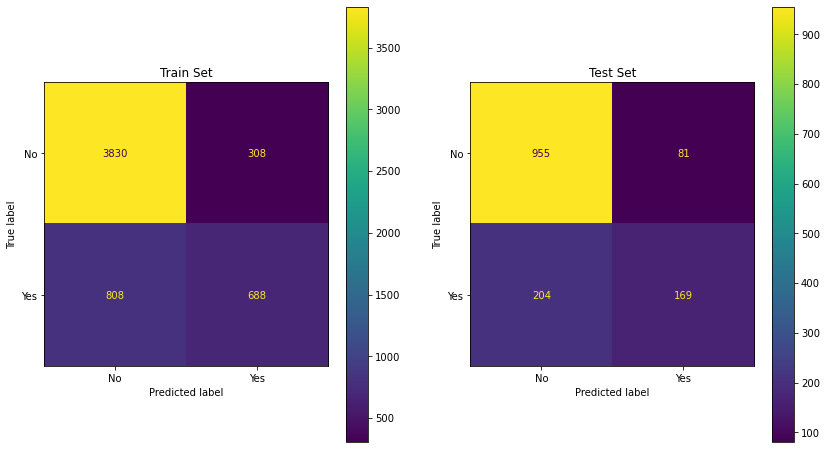

In [10]:
X_train, X_test, y_train, y_test = get_X_y_train_test(X, y, 0.2, 42)
DTC_noCV = DTC(6, X_train, y_train, X_test, True)

## LogisticRegression

In [11]:
def LogReg(X_train, y_train, X_test, displayer=False):

    model = LogisticRegression() 
    model.fit(X_train, y_train)

    y_pred_train_dt = model.predict(X_train)
    y_pred_test_dt = model.predict(X_test)

    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                             recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                                   'Test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                            recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

    if displayer:
        display(performance_df)

        fig, ax = plt.subplots(1,2, figsize=(14,8))

        plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
        ax[0].title.set_text("Train Set")

        plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
        ax[1].title.set_text("Test Set")
        plt.show()
    return model

,Error_metric,Train,Test
0,Accuracy,0.794817,0.806246
1,Precision,0.649648,0.663399
2,Recall,0.493316,0.544236


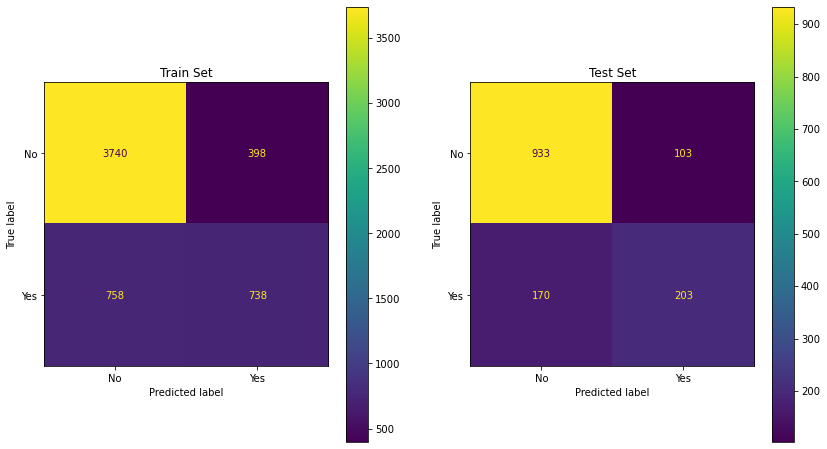

In [12]:
X_train, X_test, y_train, y_test = get_X_y_train_test(X, y, 0.2, 42)
LogReg_noCrosVal = LogReg(X_train, y_train, X_test, True)

# Model with Cross Validation

## KNeighborsClassifier - CV

In [13]:
def KNC_CV(X, y, test_size, random_state, K, displayer=False):
    
    std_scaler = StandardScaler()
    X_scaled = std_scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = get_X_y_train_test(X_scaled, y, test_size, random_state)

    neigh = KNeighborsClassifier(n_neighbors = K)
    neigh.fit(X_train, y_train)

    score_mean_accuracy_train = cross_val_score(KNeighborsClassifier(n_neighbors = K), X_train, y_train, cv = 10, scoring="accuracy").mean()
    score_mean_precision_train = cross_val_score(KNeighborsClassifier(n_neighbors = K), X_train, y_train, cv = 10, scoring="precision").mean()
    score_mean_recall_train = cross_val_score(KNeighborsClassifier(n_neighbors = K), X_train, y_train, cv = 10, scoring="recall").mean()
    score_mean_accuracy_test = cross_val_score(KNeighborsClassifier(n_neighbors = K), X_test, y_test, cv = 10, scoring="accuracy").mean()
    score_mean_precision_test = cross_val_score(KNeighborsClassifier(n_neighbors = K), X_test, y_test, cv = 10, scoring="precision").mean()
    score_mean_recall_test = cross_val_score(KNeighborsClassifier(n_neighbors = K), X_test, y_test, cv = 10, scoring="recall").mean()
    
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [score_mean_accuracy_train,
                                             score_mean_precision_train,
                                             score_mean_recall_train],
                                   'Test': [score_mean_accuracy_test,
                                            score_mean_precision_test,
                                            score_mean_recall_test]})

    if displayer:
        display(performance_df)

        fig, ax = plt.subplots(1,2, figsize=(14,8))

        plot_confusion_matrix(neigh,X_train,y_train,ax=ax[0], values_format = 'd')
        ax[0].title.set_text("Train Set")

        plot_confusion_matrix(neigh,X_test,y_test,ax=ax[1],values_format = 'd')
        ax[1].title.set_text("Test Set")
        plt.show()
    return neigh

,Error_metric,Train,Test
0,Accuracy,0.779371,0.782107
1,Precision,NaN,NaN
2,Recall,NaN,NaN


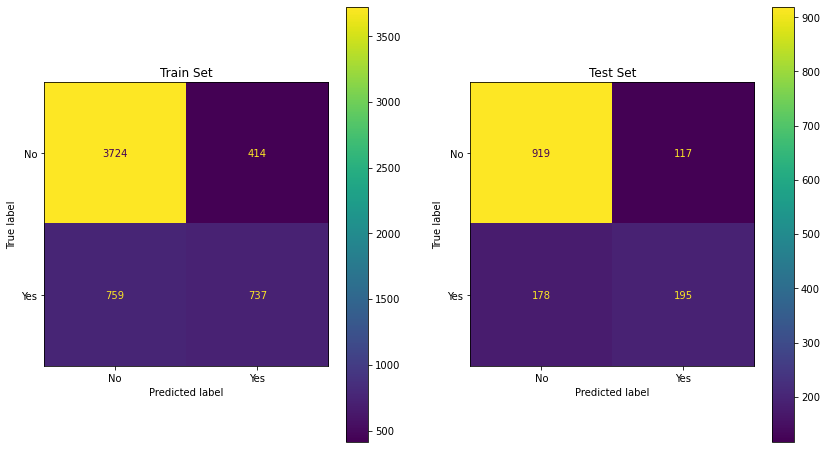

In [14]:
KNC_with_CV = KNC_CV(X, y, 0.2, 42, 28, True)

## DecisionTreeClassifier - CV

In [15]:
def DTC_CV(max_depth, X_train, y_train, X_test, displayer=False):

    model = DecisionTreeClassifier(max_depth = max_depth)
    model.fit(X_train, y_train)

    score_mean_accuracy_train = cross_val_score(DecisionTreeClassifier(max_depth = max_depth), X_train, y_train, cv = 10, scoring="accuracy").mean()
    score_mean_precision_train = cross_val_score(DecisionTreeClassifier(max_depth = max_depth), X_train, y_train, cv = 10, scoring="precision").mean()
    score_mean_recall_train = cross_val_score(DecisionTreeClassifier(max_depth = max_depth), X_train, y_train, cv = 10, scoring="recall").mean()
    score_mean_accuracy_test = cross_val_score(DecisionTreeClassifier(max_depth = max_depth), X_test, y_test, cv = 10, scoring="accuracy").mean()
    score_mean_precision_test = cross_val_score(DecisionTreeClassifier(max_depth = max_depth), X_test, y_test, cv = 10, scoring="precision").mean()
    score_mean_recall_test = cross_val_score(DecisionTreeClassifier(max_depth = max_depth), X_test, y_test, cv = 10, scoring="recall").mean()

    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [score_mean_accuracy_train,
                                             score_mean_precision_train,
                                             score_mean_recall_train],
                                   'Test': [score_mean_accuracy_test,
                                            score_mean_precision_test,
                                            score_mean_recall_test]})

    if displayer:
        display(performance_df)

        fig, ax = plt.subplots(1,2, figsize=(14,8))

        plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
        ax[0].title.set_text("Train Set")

        plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
        ax[1].title.set_text("Test Set")
        plt.show()
    return model

,Error_metric,Train,Test
0,Accuracy,0.783454,0.784225
1,Precision,NaN,NaN
2,Recall,NaN,NaN


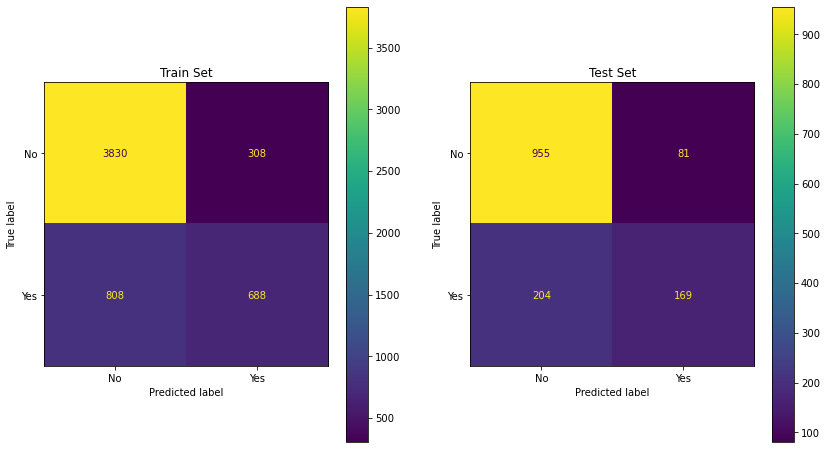

In [16]:
X_train, X_test, y_train, y_test = get_X_y_train_test(X, y, 0.2, 42)
DTC_with_CV = DTC_CV(6, X_train, y_train, X_test, True)

## LogisticRegression - CV

In [17]:
def LogRegCV(K, random_state, X_train, y_train, X_test, displayer=False):

    model = LogisticRegressionCV(cv = K, random_state = random_state)
    model.fit(X_train, y_train)

    y_pred_train_dt = model.predict(X_train)
    y_pred_test_dt = model.predict(X_test)

    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                             recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                                   'Test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                            recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

    if displayer:
        display(performance_df)

        fig, ax = plt.subplots(1,2, figsize=(14,8))

        plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
        ax[0].title.set_text("Train Set")

        plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
        ax[1].title.set_text("Test Set")
        plt.show()
    return model

,Error_metric,Train,Test
0,Accuracy,0.796237,0.816891
1,Precision,0.653982,0.692308
2,Recall,0.493984,0.554960


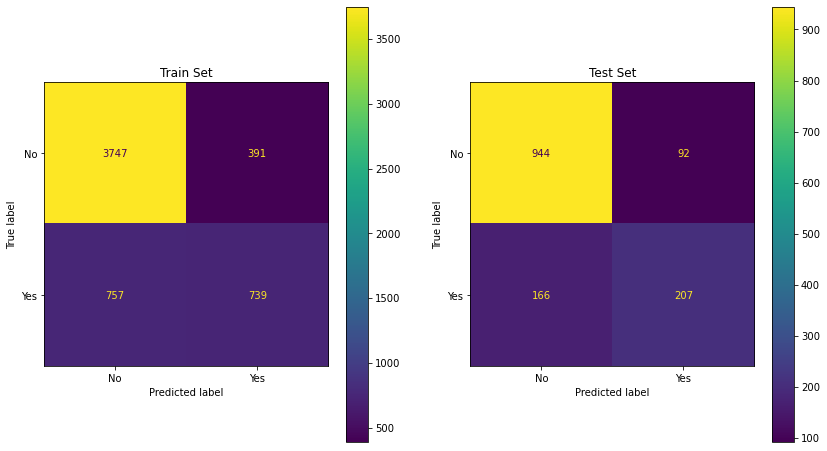

In [18]:
X_train, X_test, y_train, y_test = get_X_y_train_test(X, y, 0.2, 42)
LogReg_with_CV = LogRegCV(10, 42, X_train, y_train, X_test, True)

# Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

## Investigating Imbalance

In [19]:
display(X_hotcoded_combined_with_y["Churn"].value_counts())
imbalance = round(X_hotcoded_combined_with_y["Churn"].value_counts().values[0]/len(X_hotcoded_combined_with_y["Churn"]),2)
print(f"{imbalance*100}% of the target feature is 'No'")

No     5174
Yes    1869
Name: Churn, dtype: int64

73.0% of the target feature is 'No'


In [20]:
churn_NO = X_hotcoded_combined_with_y[X_hotcoded_combined_with_y['Churn'] == "No"]
churn_YES = X_hotcoded_combined_with_y[X_hotcoded_combined_with_y['Churn'] == "Yes"]

print(churn_NO.shape)
print(churn_YES.shape)

(5174, 23)
(1869, 23)


## Downsampling

In [21]:
churn_NO_down = churn_NO.sample(len(churn_YES))
print(churn_NO_down.shape)
print(churn_YES.shape)

X_hotcoded_combined_with_y_downSampled = pd.concat([churn_NO_down, churn_YES], axis=0)
X_hotcoded_combined_with_y_downSampled = X_hotcoded_combined_with_y_downSampled.sample(frac=1) 
X_hotcoded_combined_with_y_downSampled['Churn'].value_counts()

(1869, 23)
(1869, 23)


Yes    1869
No     1869
Name: Churn, dtype: int64

## Upsampling

In [22]:
churn_YES_up = churn_YES.sample(len(churn_NO), replace=True)
print(churn_YES_up.shape)

X_hotcoded_combined_with_y_upSampled = pd.concat([churn_NO, churn_YES_up], axis=0)
X_hotcoded_combined_with_y_upSampled = X_hotcoded_combined_with_y_upSampled.sample(frac=1) 
X_hotcoded_combined_with_y_upSampled['Churn'].value_counts()

(5174, 23)


No     5174
Yes    5174
Name: Churn, dtype: int64

## Upsampling - SMOTE

In [23]:
X, y = get_X_y(X_hotcoded_combined_with_y, "Churn")
smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X, y)
X_hotcoded_combined_with_y_upSampled_SMOTE = pd.concat([X_sm, y_sm], axis=1)
X_hotcoded_combined_with_y_upSampled_SMOTE = X_hotcoded_combined_with_y_upSampled_SMOTE.sample(frac=1) 
X_hotcoded_combined_with_y_upSampled_SMOTE['Churn'].value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

# Models with CV & after Data Balancing

## KNeighborsClassifier - CV - downsampled

,Error_metric,Train,Test
0,Accuracy,0.742475,0.715117
1,Precision,NaN,NaN
2,Recall,NaN,NaN


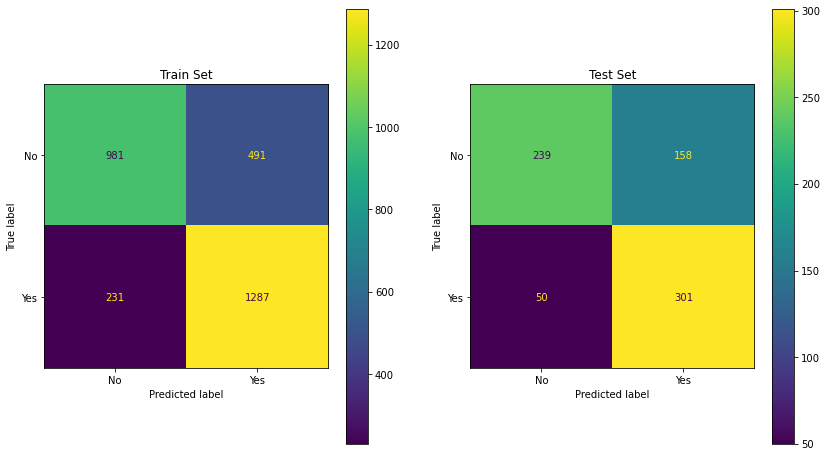

In [24]:
X, y = get_X_y(X_hotcoded_combined_with_y_downSampled, "Churn")
KNC_with_CV_balanced_downSampled = KNC_CV(X, y, 0.2, 42, 28, True)

## KNeighborsClassifier - CV - upsampled

,Error_metric,Train,Test
0,Accuracy,0.751388,0.742995
1,Precision,NaN,NaN
2,Recall,NaN,NaN


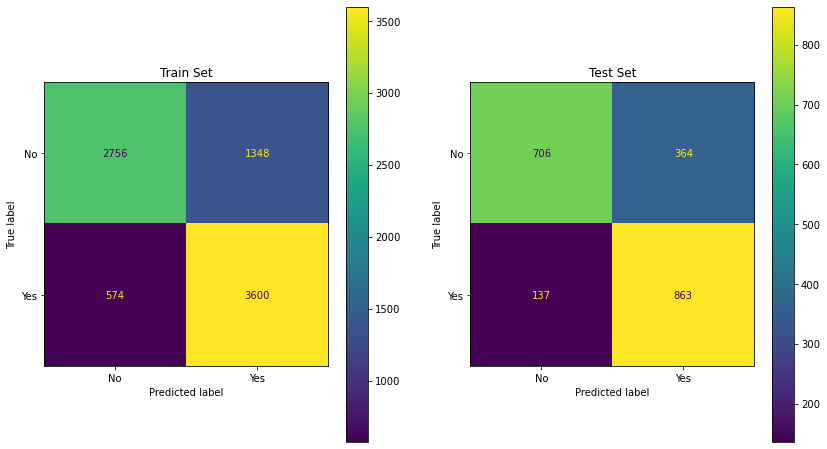

In [25]:
X, y = get_X_y(X_hotcoded_combined_with_y_upSampled, "Churn")
KNC_with_CV_balanced_upSampled = KNC_CV(X, y, 0.2, 42, 28, True)

## KNeighborsClassifier - CV - upsampled SMOTE

,Error_metric,Train,Test
0,Accuracy,0.800194,0.811594
1,Precision,NaN,NaN
2,Recall,NaN,NaN


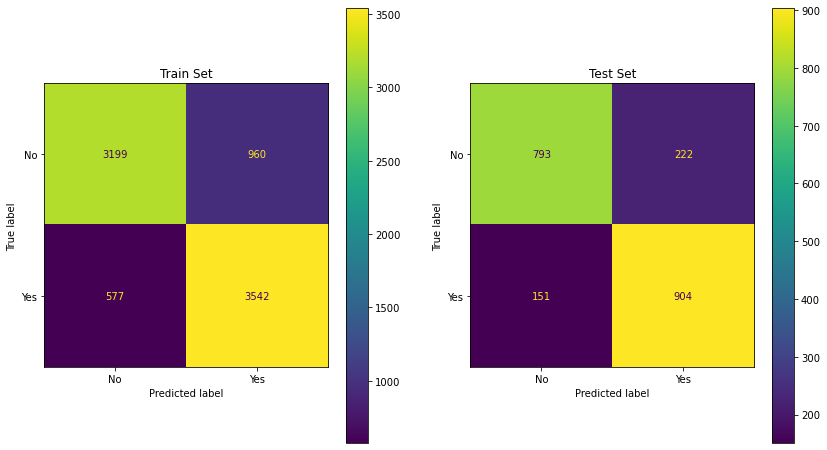

In [26]:
X, y = get_X_y(X_hotcoded_combined_with_y_upSampled_SMOTE, "Churn")
KNC_with_CV_balanced_upSampled = KNC_CV(X, y, 0.2, 42, 28, True)

## DecisionTreeClassifier - CV - downsampled

,Error_metric,Train,Test
0,Accuracy,0.74214,0.709766
1,Precision,NaN,NaN
2,Recall,NaN,NaN


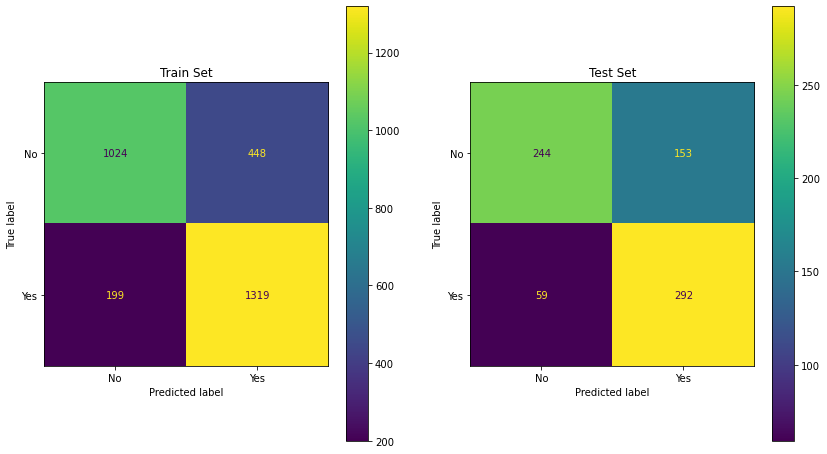

In [27]:
X, y = get_X_y(X_hotcoded_combined_with_y_downSampled, "Churn")
X_train, X_test, y_train, y_test = get_X_y_train_test(X, y, .2, 42)
DTC_with_CV_balanced_downSampled = DTC_CV(6, X_train, y_train, X_test, True)

## DecisionTreeClassifier - CV - upsampled

,Error_metric,Train,Test
0,Accuracy,0.766248,0.732367
1,Precision,NaN,NaN
2,Recall,NaN,NaN


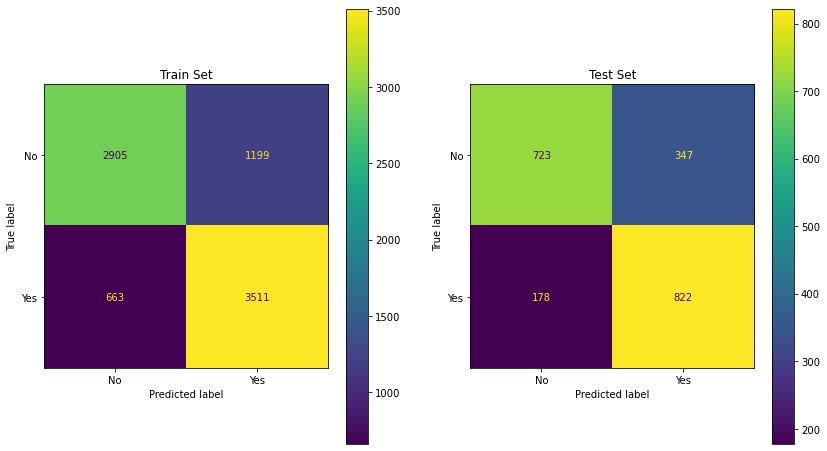

In [28]:
X, y = get_X_y(X_hotcoded_combined_with_y_upSampled, "Churn")
X_train, X_test, y_train, y_test = get_X_y_train_test(X, y, .2, 42)
DTC_with_CV_balanced_downSampled = DTC_CV(6, X_train, y_train, X_test, True)

## DecisionTreeClassifier - CV - upsampled SMOTE

,Error_metric,Train,Test
0,Accuracy,0.80128,0.801449
1,Precision,NaN,NaN
2,Recall,NaN,NaN


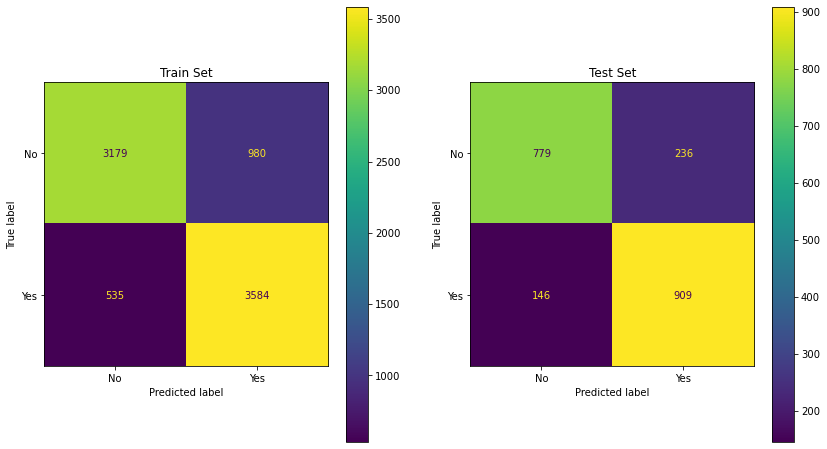

In [29]:
X, y = get_X_y(X_hotcoded_combined_with_y_upSampled_SMOTE, "Churn")
X_train, X_test, y_train, y_test = get_X_y_train_test(X, y, .2, 42)
DTC_with_CV_balanced_downSampled = DTC_CV(6, X_train, y_train, X_test, True)

## LogisticRegression - CV - downsampled

,Error_metric,Train,Test
0,Accuracy,0.752843,0.721925
1,Precision,0.746988,0.673123
2,Recall,0.776021,0.792023


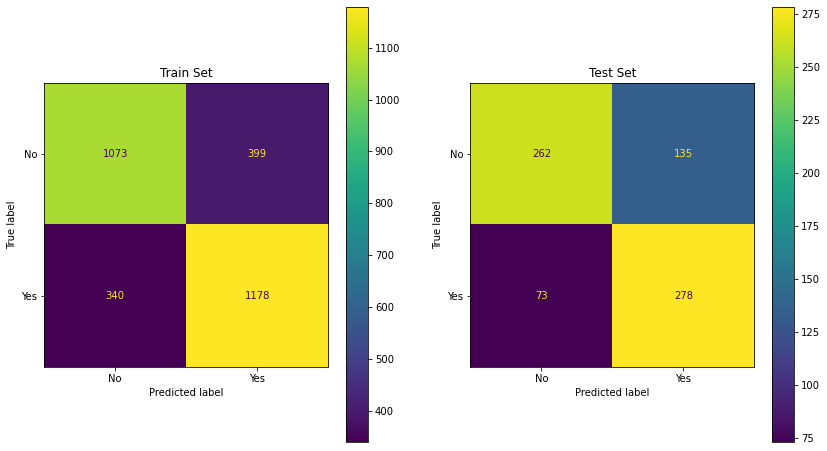

In [30]:
X, y = get_X_y(X_hotcoded_combined_with_y_downSampled, "Churn")
X_train, X_test, y_train, y_test = get_X_y_train_test(X, y, .2, 42)
DTC_with_CV_balanced_downSampled = LogRegCV(10, 42, X_train, y_train, X_test, True)

## LogisticRegression - CV - upsampled

,Error_metric,Train,Test
0,Accuracy,0.755617,0.762802
1,Precision,0.744933,0.732845
2,Recall,0.783661,0.801000


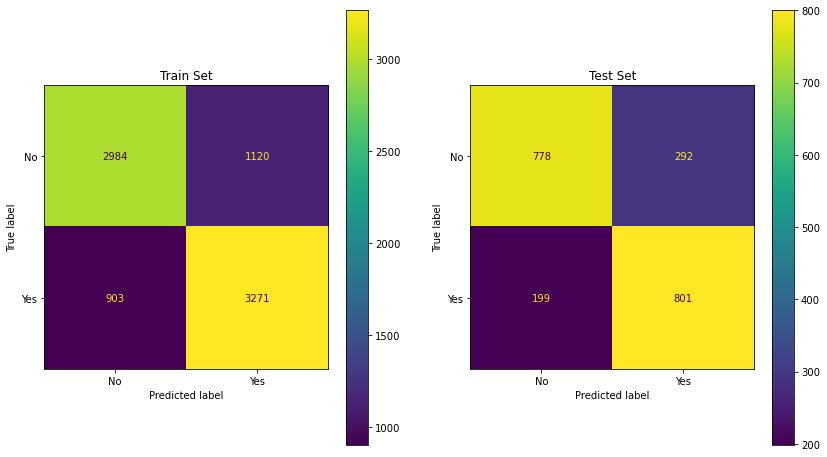

In [31]:
X, y = get_X_y(X_hotcoded_combined_with_y_upSampled, "Churn")
X_train, X_test, y_train, y_test = get_X_y_train_test(X, y, .2, 42)
DTC_with_CV_balanced_downSampled = LogRegCV(10, 42, X_train, y_train, X_test, True)

## LogisticRegression - CV - upsampled SMOTE

,Error_metric,Train,Test
0,Accuracy,0.815173,0.837681
1,Precision,0.799030,0.829514
2,Recall,0.839767,0.857820


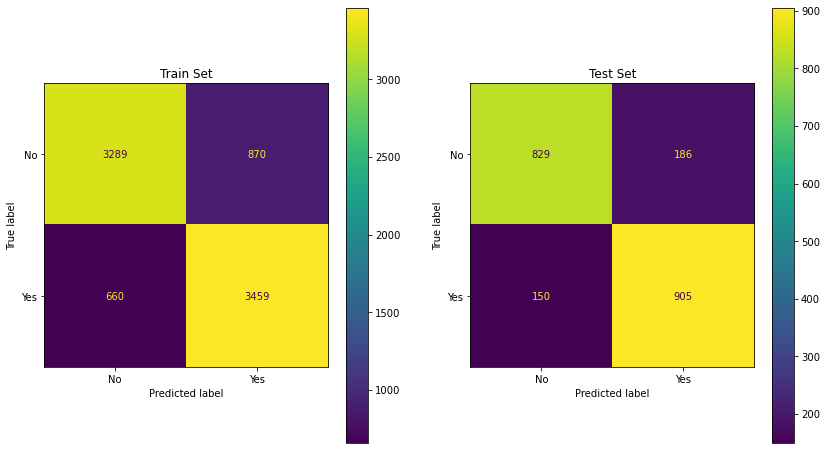

In [32]:
X, y = get_X_y(X_hotcoded_combined_with_y_upSampled_SMOTE, "Churn")
X_train, X_test, y_train, y_test = get_X_y_train_test(X, y, .2, 42)
DTC_with_CV_balanced_downSampled = LogRegCV(10, 42, X_train, y_train, X_test, True)

# Model Evaluations

In [33]:
models = ["acc_normal", "prec_normal", "rec_normal", 
          "acc_CVed", "prec_CVed", "rec_CVed", 
          "acc_CVed_downsampled", "prec_CVed_downsampled", "rec_CVed_downsampled",
          "acc_CVed_upsampled", "prec_CVed_upsampled", "rec_CVed_upsampled",
          "acc_CVed_upsampled_Smote", "prec_CVed_upsampled_Smote", "rec_CVed_upsampled_Smote"]

KNC_values = [0.790632, 0.625000, 0.522788,
              0.782107, 0, 0,
              0.748811, 0, 0,
              0.75314, 0, 0,
              0.810628, 0, 0]

DTC_values = [0.797729, 0.676000, 0.453083,
              0.782092, 0, 0,
              0.744757, 0, 0,
              0.745411, 0, 0,
              0.810628, 0, 0]

LogReg_values = [0.806246, 0.663399, 0.544236,
                 0.816891, 0.692308, 0.554960,
                 0.768717, 0.732673, 0.819945, 
                 0.760386, 0.753119, 0.794173,
                 0.835749, 0.813996, 0.864971]

model_comparison = pd.DataFrame({
    "Models" : models,
    "KNeighborsClassifier" : KNC_values,
    "DecisionTreeClassifier" : DTC_values ,
    "LogisticRegression" : LogReg_values
})

model_comparison

,Models,KNeighborsClassifier,DecisionTreeClassifier,LogisticRegression
0,acc_normal,0.790632,0.797729,0.806246
1,prec_normal,0.625000,0.676000,0.663399
2,rec_normal,0.522788,0.453083,0.544236
3,acc_CVed,0.782107,0.782092,0.816891
4,prec_CVed,0.000000,0.000000,0.692308
5,rec_CVed,0.000000,0.000000,0.554960
6,acc_CVed_downsampled,0.748811,0.744757,0.768717
7,prec_CVed_downsampled,0.000000,0.000000,0.732673
8,rec_CVed_downsampled,0.000000,0.000000,0.819945
9,acc_CVed_upsampled,0.753140,0.745411,0.760386


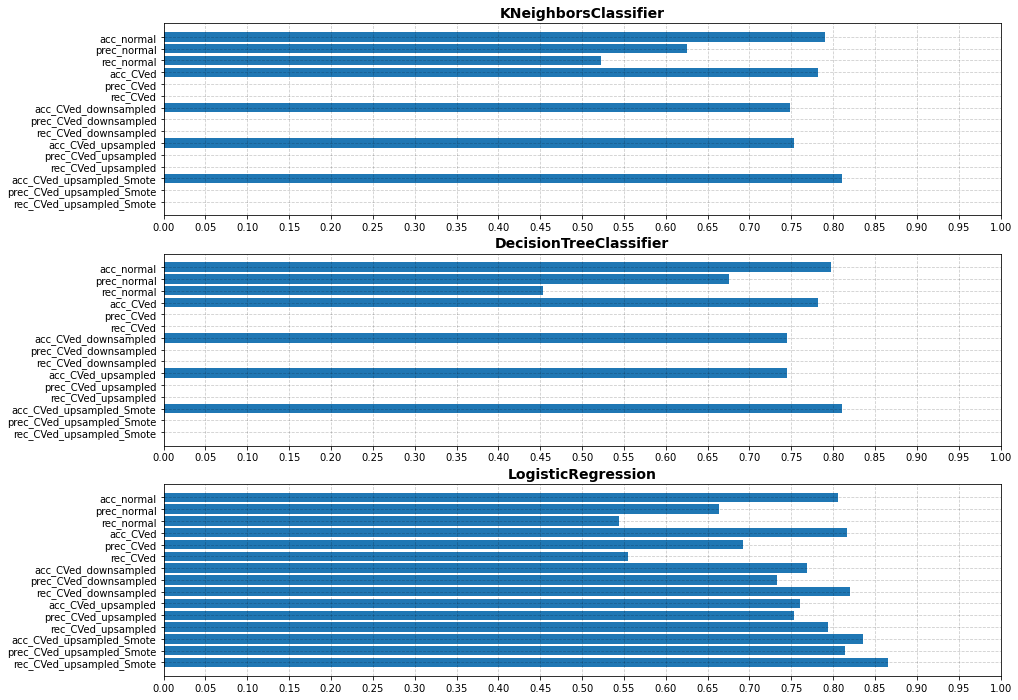

In [35]:
fig, ax = plt.subplots(3,1,figsize=(15,12))

ax[0].set_title("KNeighborsClassifier", weight="bold", size=14)
ax[0].grid(ls="--", color="k", alpha=0.2)
ax[0].barh(model_comparison["Models"][::-1], model_comparison["KNeighborsClassifier"][::-1])
ax[0].set_xticks(np.arange(0,1.05,0.05))
#ax[0].set_yticks(model_comparison["Models"][::-1], color=colors)

ax[1].set_title("DecisionTreeClassifier", weight="bold", size=14)
ax[1].grid(ls="--", color="k", alpha=0.2)
ax[1].barh(model_comparison["Models"][::-1], model_comparison["DecisionTreeClassifier"][::-1])
ax[1].set_xticks(np.arange(0,1.05,0.05))

ax[2].set_title("LogisticRegression", weight="bold", size=14)
ax[2].grid(ls="--", color="k", alpha=0.2)
ax[2].barh(model_comparison["Models"][::-1], model_comparison["LogisticRegression"][::-1])
ax[2].set_xticks(np.arange(0,1.05,0.05))

plt.show()

In [36]:
model_comparison_acc = model_comparison.iloc[[0,3,6,9,12],:]
model_comparison_prec = model_comparison.iloc[[1,4,7,10,13],:]
model_comparison_rec = model_comparison.iloc[[2,5,8,11,14],:]

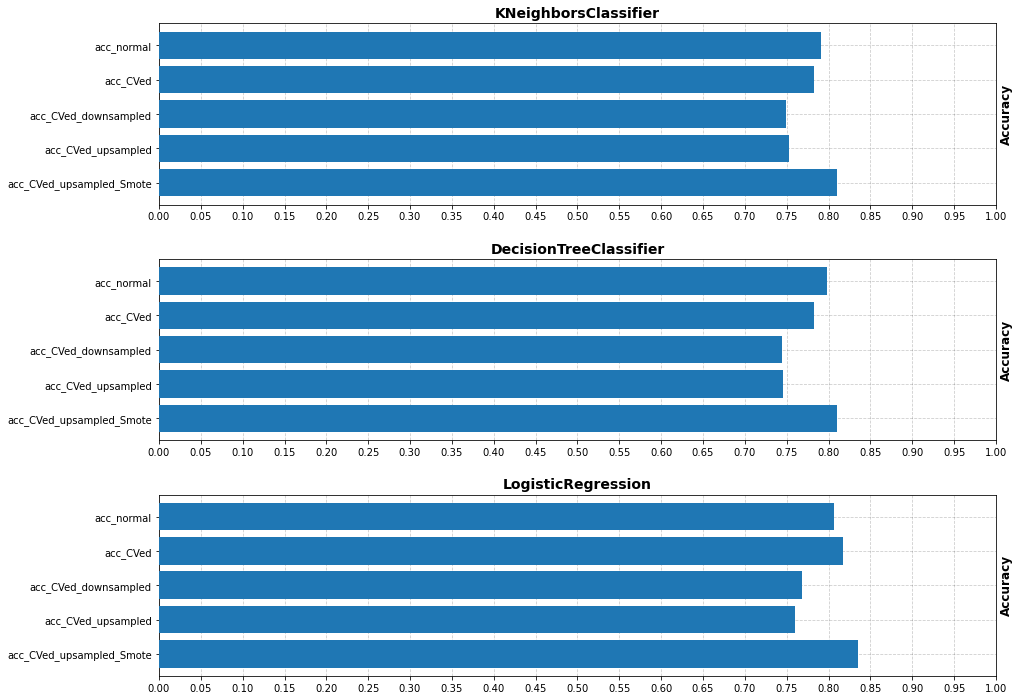

In [37]:
fig, ax = plt.subplots(3,1,figsize=(15,12))

ax[0].set_title("KNeighborsClassifier", weight="bold", size=14, zorder=0)
ax[0].grid(ls="--", color="k", alpha=0.2)
ax[0].barh(model_comparison_acc["Models"][::-1], model_comparison_acc["KNeighborsClassifier"][::-1], zorder=3)
ax[0].set_xticks(np.arange(0,1.05,0.05))
ax[0].set_ylabel("Accuracy", weight="bold", size=12)
ax[0].yaxis.set_label_position("right")

ax[1].set_title("DecisionTreeClassifier", weight="bold", size=14, zorder=0)
ax[1].grid(ls="--", color="k", alpha=0.2)
ax[1].barh(model_comparison_acc["Models"][::-1], model_comparison_acc["DecisionTreeClassifier"][::-1], zorder=3)
ax[1].set_xticks(np.arange(0,1.05,0.05))
ax[1].set_ylabel("Accuracy", weight="bold", size=12)
ax[1].yaxis.set_label_position("right")

ax[2].set_title("LogisticRegression", weight="bold", size=14, zorder=0)
ax[2].grid(ls="--", color="k", alpha=0.2)
ax[2].barh(model_comparison_acc["Models"][::-1], model_comparison_acc["LogisticRegression"][::-1], zorder=3)
ax[2].set_xticks(np.arange(0,1.05,0.05))
ax[2].set_ylabel("Accuracy", weight="bold", size=12)
ax[2].yaxis.set_label_position("right")

plt.subplots_adjust(hspace=.3)
plt.show()

----------------------------------------

**Round 4**

- fit a Random forest Classifier on the data and compare the accuracy.
- tune the hyper paramters with gridsearch and check the results.


# RandomForestClassifier

## Naive RandomForestClassifier

### RandomForestClassifier with unbalanced data

In [52]:
X_train, X_test, y_train, y_test = get_X_y_train_test(X, y, .2, 42)

clf_RFC_unbalanced = RandomForestClassifier(max_depth = 6,
                             min_samples_leaf = 50,
                             max_features = None,
                             n_estimators = 100,
                             bootstrap = True, 
                             oob_score = True, 
                             random_state = 42).fit(X_train, y_train)

RFC_cross_val_scores_unbalanced = cross_val_score(clf_RFC_unbalanced, X_train, y_train, cv = 10)
RFC_cross_val_scores_unbalanced_mean = RFC_cross_val_scores_unbalanced.mean()
print(f"Accuracy with RandomForestClassifier and unbalanced data = {round(RFC_cross_val_scores_unbalanced.mean(),5)}")

Accuracy with RandomForestClassifier and unbalanced data = 0.80877


### RandomForestClassifier with downsampled data

In [53]:
X, y = get_X_y(X_hotcoded_combined_with_y_downSampled, "Churn")
X_train, X_test, y_train, y_test = get_X_y_train_test(X, y, .2, 42)

clf_RFC_downsampled = RandomForestClassifier(max_depth = 6,
                             min_samples_leaf = 50,
                             max_features = None,
                             n_estimators = 100,
                             bootstrap = True, 
                             oob_score = True, 
                             random_state = 42).fit(X_train, y_train)

RFC_cross_val_scores_downsampled = cross_val_score(clf_RFC_downsampled, X_train, y_train, cv = 10)
RFC_cross_val_scores_downsampled_mean = RFC_cross_val_scores_downsampled.mean()
print(f"Accuracy with RandomForestClassifier and downsampled data = {round(RFC_cross_val_scores_downsampled_mean,5)}")

Accuracy with RandomForestClassifier and downsampled data = 0.75819


### RandomForestClassifier with SMOTE-upsampled data

In [54]:
X, y = get_X_y(X_hotcoded_combined_with_y_upSampled_SMOTE, "Churn")
X_train, X_test, y_train, y_test = get_X_y_train_test(X, y, .2, 42)

clf_RFC_smoteupsampled = RandomForestClassifier(max_depth = 6,
                             min_samples_leaf = 50,
                             max_features = None,
                             n_estimators = 100,
                             bootstrap = True, 
                             oob_score = True, 
                             random_state = 42).fit(X_train, y_train)

RFC_cross_val_scores_smoteupsampled = cross_val_score(clf_RFC_smoteupsampled, X_train, y_train, cv = 10)
RFC_cross_val_scores_smoteupsampled_mean = RFC_cross_val_scores_smoteupsampled.mean()
print(f"Accuracy with RandomForestClassifier and downsampled data = {round(RFC_cross_val_scores_smoteupsampled_mean,5)}")

Accuracy with RandomForestClassifier and downsampled data = 0.80877


## Hyper Parameter Tuning with GridsearchCV

In [62]:
X, y = get_X_y(X_hotcoded_combined_with_y_upSampled_SMOTE, "Churn")
X_train, X_test, y_train, y_test = get_X_y_train_test(X, y, .2, 42)

In [69]:
param_grid = {
    'n_estimators': [50, 100, 250, 500, 750],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf' : [1, 2, 3, 4],
    "n_jobs" : [-1],
    "random_state" : [42, 69]
    #'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False] 
    }

clf_RFC_GsCV = RandomForestClassifier(param_grid, oob_score = True)

grid_search = GridSearchCV(clf_RFC_GsCV, param_grid, cv = 10, return_train_score = True).fit(X_train,y_train)
grid_search.best_params_

{'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 250,
 'n_jobs': -1,
 'random_state': 69}

In [68]:
param_grid_optimized = {'min_samples_leaf': 1,
                         'min_samples_split': 6,
                         'n_estimators': 250,
                         'n_jobs': -1,
                        'random_state': 69}

clf_RFC_GsCV_opt = RandomForestClassifier(min_samples_leaf = 1,
                                          min_samples_split = 6,
                                          n_estimators = 250,
                                          n_jobs = -1,
                                          random_state = 69, 
                                          oob_score = True)

clf_RFC_GsCV_opt_cross_val_scores = cross_val_score(clf_RFC_GsCV_opt, X_train, y_train, cv = 10)
clf_RFC_GsCV_opt_cross_val_scores = clf_RFC_GsCV_opt_cross_val_scores.mean()

print(f"Accuracy with GridsearchCV-RandomForestClassifier and SMOTE-upsampled data = {round(clf_RFC_GsCV_opt_cross_val_scores,5)}")

Accuracy with GridsearchCV-RandomForestClassifier and SMOTE-upsampled data = 0.83511
